<a href="https://colab.research.google.com/github/rajbhadalia/ML.01/blob/master/ML_exp_J006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install livelossplot

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from livelossplot import PlotLossesKeras

from keras import layers
from keras import models
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore')

import timeit
import time
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas as pd
import numpy as np
import keras
from keras import models
from keras import layers
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf

# Preprocessing

In [3]:
data=pd.read_csv("/content/Frogs_MFCCs.csv")

In [4]:
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,-0.000717,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,0.000856,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,0.011868,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,-0.003997,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [5]:
data.isnull().sum()
#checking for NA values

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

In [6]:
data.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')

In [7]:
data = data.drop('RecordID', axis = 1)

In [8]:
data.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species'],
      dtype='object')

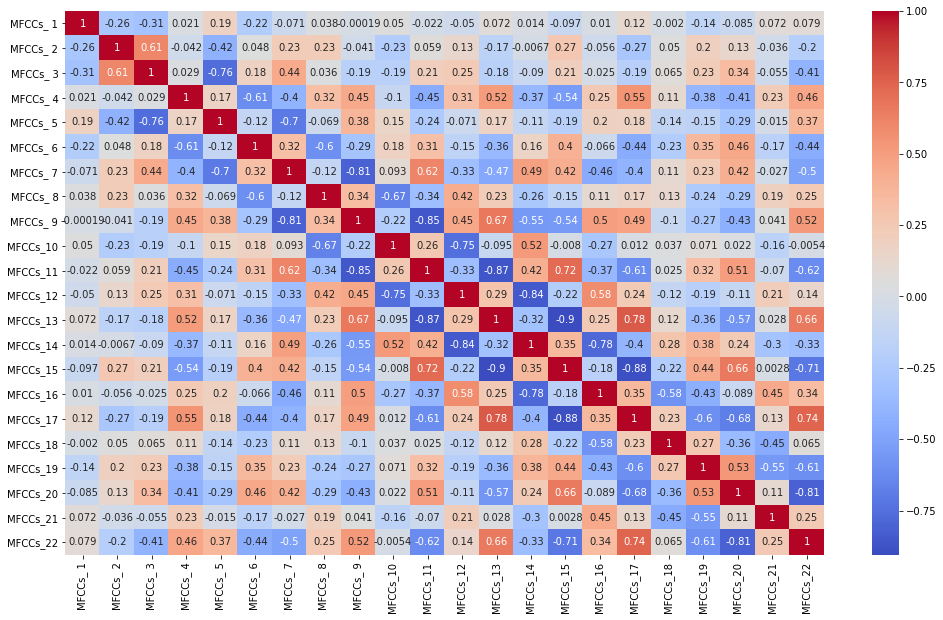

In [9]:
fig = plt.figure(figsize = (17, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [10]:
x=data.drop(['Family','Genus','Species'],axis=1)
y=data['Species']

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=LE.fit_transform(y)

In [12]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [13]:
lr = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

grid = GridSearchCV(lr, parameters, cv = 5)
random = RandomizedSearchCV(lr, parameters, cv = 5)


nn = models.Sequential()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,
                                                   shuffle = True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5756, 22) (1439, 22)
(5756,) (1439,)


GRID SEARCH CV

In [15]:
grid.fit(x_train, y_train)
print('Best Score: ', grid.best_score_)

Best Score:  0.6829474058566092


RANDOM SEARCH CV

In [16]:
random.fit(x_train, y_train)
print('Best Score: ', random.best_score_)

Best Score:  0.6829474058566092


NEURAL NETWORKS

In [17]:
nn = models.Sequential()
nn.add(Dense(512, activation='relu', input_shape=(22,)))
nn.add(Dense(256, activation='tanh'))
nn.add(Dense(10, activation='softmax'))
nn.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'mean_squared_error')

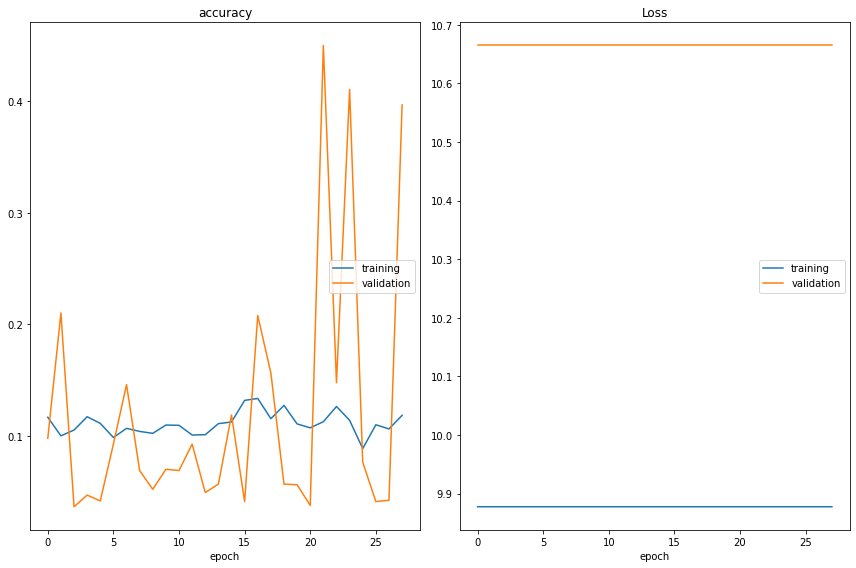

accuracy
	training         	 (min:    0.089, max:    0.134, cur:    0.118)
	validation       	 (min:    0.036, max:    0.450, cur:    0.397)
Loss
	training         	 (min:    9.877, max:    9.877, cur:    9.877)
	validation       	 (min:   10.665, max:   10.665, cur:   10.665)
202/202 [==============================] - 1s 5ms/step - loss: 9.8775 - accuracy: 0.1184 - val_loss: 10.6648 - val_accuracy: 0.3966
Epoch 00028: early stopping


In [18]:
es = EarlyStopping(monitor = 'val_accuracy', patience = 25, verbose = 1, mode = 'min')
callbacks = [es, PlotLossesKeras()]
nn.fit(x_train, y_train, epochs = 100, batch_size = 15, validation_split = 0.3, callbacks = callbacks)

RANDOM FOREST

In [19]:
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import os

In [20]:

trainedforest = RandomForestClassifier(n_estimators=700).fit(x_train,y_train)
predictionforest = trainedforest.predict(x_test)
trainedforest.score(x_train, y_train)

1.0

In [21]:
p = trainedforest.predict(x_test)
#print(X_Test)
print(list(p).count(1))
print(list(p).count(2))

710
116
